Introduction to spherical droplet case study
===

In this notebook we will study the different discrete approximations of curvatures in an idealised droplet, suspended in space with no external force fields present, modelled using the Young-Laplace equation. The idealised geometry of the problem allows for a more exact study of numerical errors by comparisons to the solution from the predefined geometry:

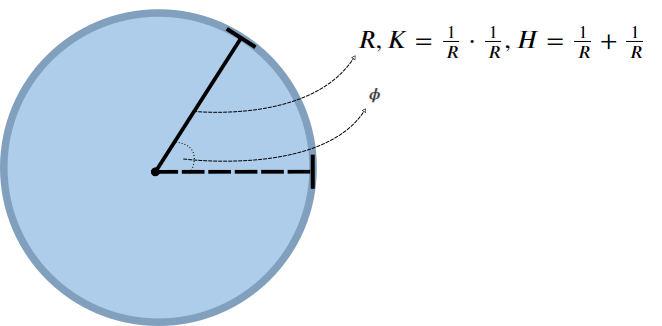

The Young-Laplace has an exact analytical solution $\Delta p$, related to the radius of the oscullating circle $R$:

$$
\Delta p=-\gamma H_{f}=-\gamma\left(\frac{1}{R_{1}}+\frac{1}{R_{2}}\right)=\frac{2 \gamma}{R}
$$


The purpose of this study is thus to find discretised approximiations of $H_{f} = \frac{2}{R}$ in order to provide insights into how we can compute numerical accuracies when simulating non-ideal systems. We use the following nomenclature and conventions throughout (from the course notes of Keenan Crane (https://brickisland.net/DDGSpring2020) (CC 4.0))


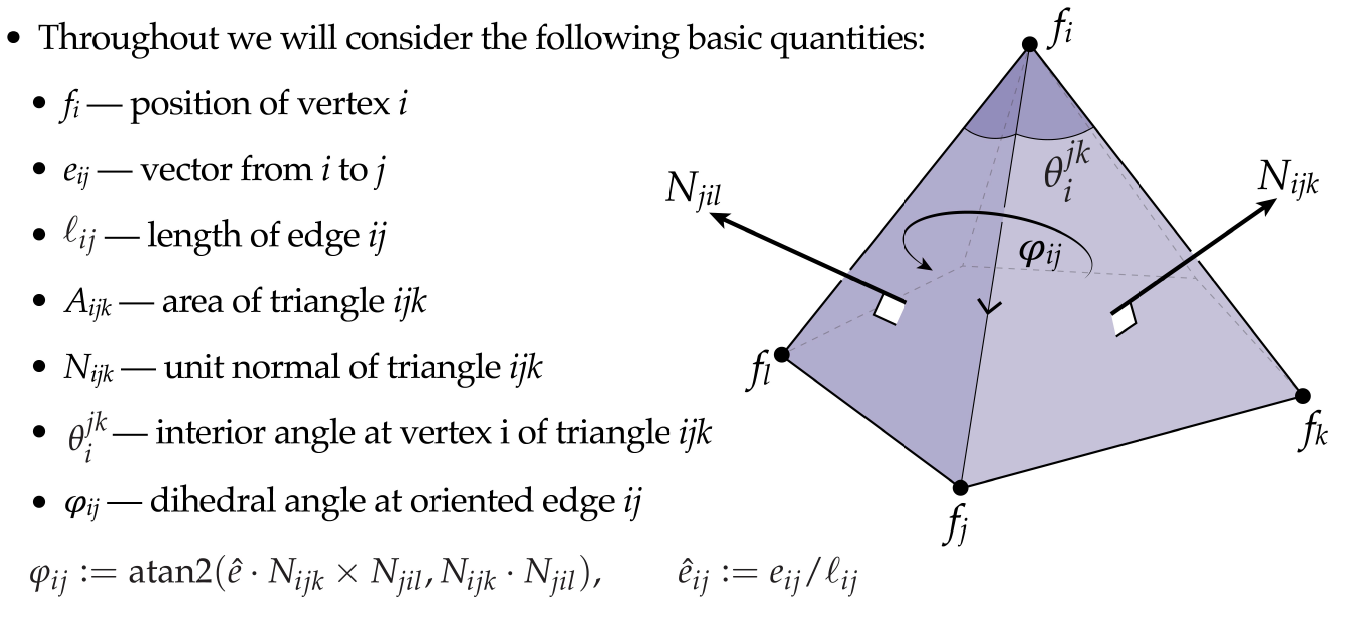

From the same notes the following overview of all discrete approximations and their relation to the smooth curvature definitions is also provided:

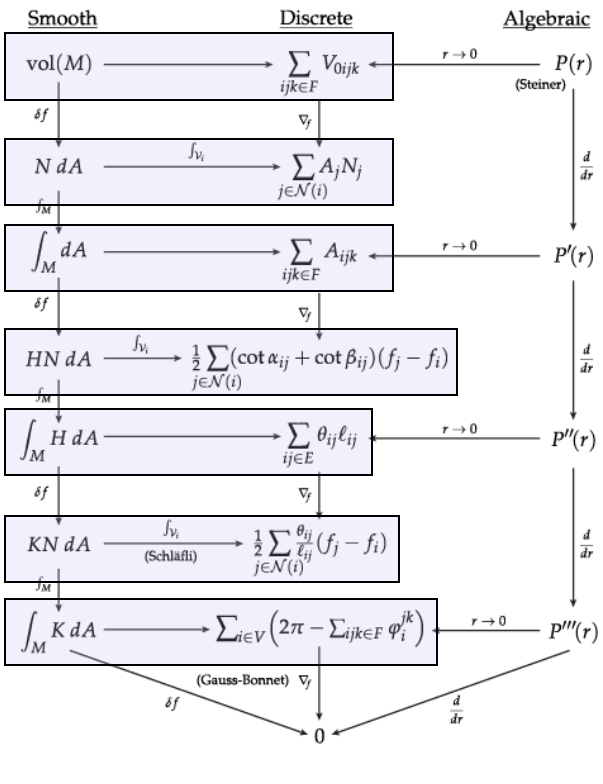

### We consider the following definitions for *vector curvatures*:

Gaussian normal curvature: $$\mathrm{KNdA} = \frac{1}{2} \sum_{i j \in \mathrm{St}(i)} \frac{\varphi_{i j}}{\ell_{i j}}\left(f_{j}-f_{i}\right)$$
Mean normal curvature: $$H N dA = \frac{1}{2} \sum_{i j \in \mathrm{St}(i)}\left(\cot \alpha_{i j}+\cot \beta_{i j}\right)\left(f_{i}-f_{j}\right)$$
Area: $$N d A = \frac{1}{6} \sum_{i j k \in \mathrm{St}(i)} f_{j} \times f_{k}$$
Volume: (No Hodge dual in $\mathbb{R}^3$; scalar values only)


### ...and the following definitions for *scalar curvatures*:

Gaussian curvature (angle defect): $$ \Omega_{i}:=2 \pi-\sum_{i j k} \theta_{i}^{j k}$$
Mean curvature: $$H_{i j}:=\frac{1}{2} \ell_{i j} \varphi_{i j}$$
Area: $$A_{i j k}$$
Volume: $$V_{i j k}$$

### The Gaussian and mean curvatures are related to each other through the principle curvatures:

Gaussian: $K=\kappa_{1} \kappa_{2}$

Mean: $H=\frac{\kappa_{1}+\kappa_{2}}{2}$

Since we know that $\kappa_{1} = \kappa_{2} $ we have $K=\kappa_{1}^2$ so 

$$
H=\frac{\sqrt{K}+\sqrt{K}}{2}
$$

The principle curvatures in the smooth setting are defined by:

$$
\begin{array}{l}
\kappa_{1}=H-\sqrt{H^{2}-K} \\
\kappa_{2}=H+\sqrt{H^{2}-K}
\end{array}
$$

The discrete principle curvatures can be found from

$$\frac{H_{i}}{A_{i}} \pm \sqrt{\left(\frac{H_{i}}{A_{i}}\right)^{2}-\frac{K_{i}}{A_{i}}}$$

Where the vertex normal curvature $H_{i}:=\frac{1}{4} \sum_{i j \in E} \ell_{i j} \varphi_{i j}$ is normalized over the area of the dual cell $A_{i}:=\left|C_{i}\right|$:


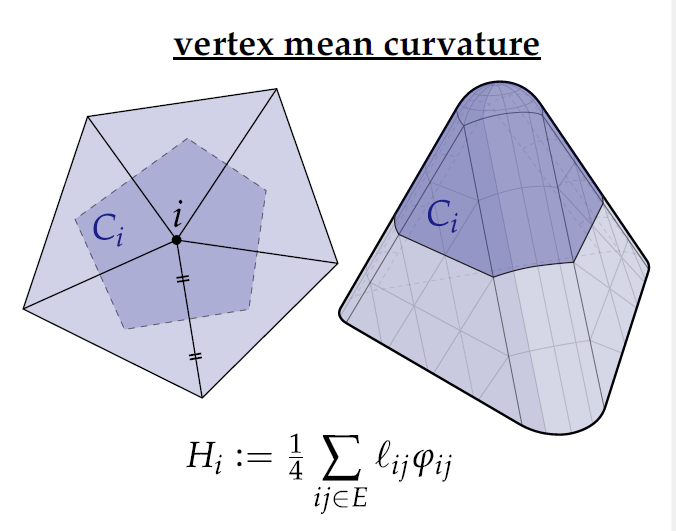


### ...finally the algebraic perpective allows us to compute curvatures from the Steiner polynomials (of a mollified surface):

$$
\text { volume }_{\varepsilon}(f)=V_{0}+\varepsilon \sum_{i j k \in F} A_{i j k}+\varepsilon^{2} \sum_{i j \in E} \ell_{i j} \varphi_{i j}+\varepsilon^{3} \sum_{i \in V} \Omega_{i}
$$

$$
\begin{array}{l}
\frac{d}{d \varepsilon} \text { volume }_{\varepsilon}=\text { area }_{\varepsilon} \\
\frac{d}{d \varepsilon} \text { area }_{\varepsilon}=\operatorname{mean}_{\varepsilon} \\
\frac{d}{d \varepsilon} \operatorname{mean}_{\varepsilon}=\text { Gauss }_{\varepsilon} \\
\frac{d}{d \varepsilon} \text { Gauss }_{\varepsilon}=0
\end{array}
$$

# Other notes:

#### Notes on the angle defect in the plane:

An equality that holds only when there is no curvature

$$2 \pi-\sum_{i} \theta_{i}=\frac{1}{6} \pi \varepsilon^{2} K$$

which was derived from the relation of ratios between spheres/balls of radius $\varepsilon$:

$$\frac{\varepsilon^{2}}{12} K \approx 1-\frac{\left|B_{g}(\varepsilon)\right|}{\left|B_{\mathbb{R}^{2}}(\varepsilon)\right|}$$

so that demonstrates how this equality is the integrated Gaussian curvature and this integral is the same for slight variations of $\varepsilon$. In the future we will study if it is possible to recover exact rations for different values of $\varepsilon$ by studying how exactly the area ratios vary. 

In the Extrinsic viewpoint the angle defect $\Omega$ becomes the integrated area on the unit sphere.



Discrete Gauss Bonnet Theorem:

$$\sum_{i \in \mathrm{int} V} \Omega_{i}+\sum_{i \in \partial V} \kappa_{i}=2 \pi \chi$$

where the boundary vertices are
$$\kappa_{i}:=\pi-\sum_{i j k} \theta_{i}^{j k}$$


Note the derivation of the mean cuvature normal:
$$
(H N)_{i}:=\frac{1}{2} \sum_{i j \in E}\left(\cot \alpha_{i j}+\cot \beta_{i j}\right)\left(f_{i}-f_{j}\right)
$$

should be interpreted as the _integrated_ curvature over the dual cell

$$
\int_{C} H N d A=\int_{C} d f \wedge d N=\int_{C} d N \wedge d f=\int_{C} d(N \wedge d f)=
$$

Next we apply $\int_{\partial \Omega} \omega=\int_{\Omega} d \omega$ (a generalisation of the Fundamental Theorem of Calculus that applies to any manifold $\Omega$, other special cases are for example Green's Theorem and the Divergence Theorem)

$$
\int_{\partial C} N \wedge d f=\sum_{j} \int_{e_{i j}^{*}} N \wedge d f=\sum_{j} N_{a} \times(m-a)+N_{b} \times(b-m)
$$

...that is why we often divide by $C_{ijk}$ as opposed to $A_{ijk}$ to find the point mean curvature.


In [1]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider
%matplotlib notebook

# Parameters for a water droplet in air at standard laboratory conditions
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

from ddgclib import *
from ddgclib._complex import Complex
#from ddgclib.curvatures import plot_surface, curvature

# Colour scheme for surfaces
db = np.array([129, 160, 189]) / 255  # Dark blue
lb = np.array([176, 206, 234]) / 255  # Light blue

#### First we compute the minimum half-sphere-symmetric discretisation of the sphere:

C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\_complex.py:3751: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


[0. 0. 1.]
[ 1.2246468e-16  0.0000000e+00 -1.0000000e+00]
[-5.00000000e-01  8.66025404e-01  6.12323400e-17]
[-5.00000000e-01 -8.66025404e-01  6.12323400e-17]
[ 1.0000000e+00 -2.4492936e-16  6.1232340e-17]


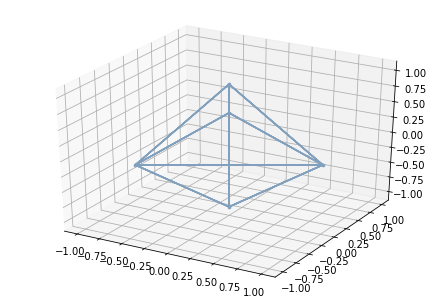

In [2]:
R = 1.0  # Radius of the droplet sphere
H_f = 1/R + 1/R
K_f = (1/R)**2

theta = 0
phi = 0.0

def sphere(R, theta, phi):
    return R * np.cos(theta) * np.sin(phi), R * np.sin(theta) * np.sin(phi), R * np.cos(phi)

#Theta = np.linspace(0.0, 2*np.pi)  # range of theta
#Phi = np.linspace(0.0, np.pi)  # range of phi
x, y, z = sphere(R, theta, phi)

#Theta = [0.0, 0.0, (1/2.0)*np.pi, np.pi, 1.5*np.pi, 2.0*np.pi]
Theta = [0.0, 0.0, (1.0/ 3.0) * 2*np.pi, (2.0/ 3.0) * 2*np.pi, 2*np.pi]
#Phi = [0.0, np.pi, (1/2.0)*np.pi, (1/2.0)*np.pi, (1/2.0)*np.pi, (1/2.0)*np.pi]
Phi = [0.0, np.pi, (1/2.0)*np.pi, (1/2.0)*np.pi, (1/2.0)*np.pi]
F = []
for theta, phi in zip(Theta, Phi):
    x, y, z = sphere(R, theta, phi)
    F.append(np.array([x, y, z]))

#F = [f0, f1, f2, f3, f4, f5]  # Debugging
F = np.array(F)

# Connections (nearest neighbours)
# Now let i=0 we find the other indices from nearest neighbours
if 0:  # Old
    nn = np.array([[2, 3, 4, 5],  # Top of sphere
                   [2, 3, 4, 5],  # Bottom of sphere
                   [0, 1, 3, 5],  # 2
                   [0, 1, 2, 4],  # 3
                   [0, 1, 3, 5],  # 4
                   [0, 1, 2, 4],  # 5
                   ])
    
nn = np.array([[2, 3, 4],  # Top of sphere
               [2, 3, 4],  # Bottom of sphere
               [0, 1, 3, 4],  # 2
               [0, 1, 2, 4],  # 3
               [0, 1, 2, 3],  # 4
               ])

fig, axes, HC = plot_surface(F, nn)
axes.set_xlim3d(-(0.1*R + R) , 0.1*R + R)
axes.set_ylim3d(-(0.1*R + R) , 0.1*R + R)
axes.set_zlim3d(-(0.1*R + R) , 0.1*R + R)
for f in F:
    print(f)

#### We can wrap this routine to allow us to plot the curvature errors for different discretisations $N$ and angles $\phi$

C:\Users\Endres\Desktop\iwt-projects\ddg\ddgclib\_complex.py:3751: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(-0.55, 0.55)

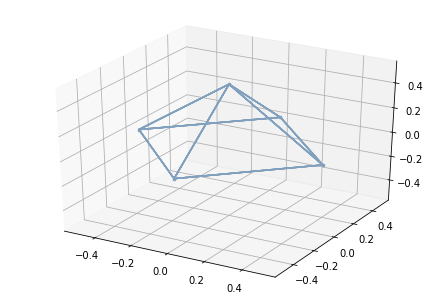

In [3]:
def droplet_half_init(R, N, phi):
    # Theta = np.linspace(0.0, 2*np.pi)  # range of theta
    # Phi = np.linspace(0.0, np.pi)  # range of phi
    def sphere(R, theta, phi):
        return R * np.cos(theta) * np.sin(phi), R * np.sin(theta) * np.sin(phi), R * np.cos(phi)

    Theta = np.linspace(0.0, 2*np.pi, N)  # range of theta
    Phi = [0] + [phi,]*(N - 1)  
    F = []
    nn = []
    ind = -1
    for theta, phi in zip(Theta, Phi):
        ind += 1
        # Define coordinates:
        x, y, z = sphere(R, theta, phi)
        F.append(np.array([x, y, z]))
        # Define connections:
        nn.append([])
        if ind > 0:
            nn[0].append(ind)
            nn[ind].append(0)
            nn[ind].append(ind - 1)
            nn[ind].append((ind + 1) % N)

    F = np.array(F)
    nn[1][1] = ind

    return F, nn

def construct_HC(F, nn):
    HC = Complex(3)
    V = []
    for f in F:
        V.append(HC.V[tuple(f)])
    for i, i_nn in enumerate(nn):
        for i_v2 in i_nn:
            V[i].connect(V[i_v2])
    return HC

# Example using 6 boundary veritces:
R = 0.5  # Radius of the droplet sphere
N = 5
N = 5
H_f = 1/R + 1/R
K_f = (1/R)**2
phi = (1.0/2.0)*np.pi

# Contruct the simplicial complex, plot the initial construction:
F, nn = droplet_half_init(R, N, phi)
fig, axes, HC = plot_surface(F, nn)
axes.set_xlim3d(-(0.1*R + R) , 0.1*R + R)
axes.set_ylim3d(-(0.1*R + R) , 0.1*R + R)
axes.set_zlim3d(-(0.1*R + R) , 0.1*R + R)

In [15]:
def out_plot(N=5, R=0.5):
    Phi = np.linspace(0.1, 0.5 * np.pi, 20)
    # Phi = np.linspace((1/2.0)*np.pi, 0.9*np.pi, 50)
    H_f = 1 / R + 1 / R
    K_f = (1 / R) ** 2
    #dp_exact = gamma * H_f

    # Containers
    H_i = []
    H_ij_sum = []
    K = []
    KNdA_ij_sum = []
    KNdA_ij_dot = []
    HNdA_ij_sum = []
    HNdA_ij_dot = []
    #HNdA_i = []
    HdotNdA_ij_sum = []
    N_f0 = np.array([0.0, 0.0, 1.0])
    c_outd_list = []
    
    for phi in Phi:
        # Contruct the simplicial complex, plot the initial construction:
        F, nn = droplet_half_init(R, N, phi)
        HC = construct_HC(F, nn)
        v = HC.V[(0.0, 0.0, R)]
        F, nn = vectorise_vnn(v)

        # Compute discrete curvatures
        c_outd = curvatures(F, nn, n_i=N_f0)

        # Save results
        #c_outd = curvatures(F, nn)
        c_outd['K_f'] = K_f
        c_outd['H_f'] = H_f
        H_i.append(c_outd['H_i'])
        H_ij_sum.append(c_outd['H_ij_sum'])
        HNdA_ij_sum.append(np.sum(c_outd['HNdA_ij']))
        HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        KNdA_ij_sum.append(np.sum(c_outd['KNdA_ij']))
        KNdA_ij_dot.append(np.sum(np.dot(c_outd['KNdA_ij'], c_outd['n_i'])))
        #HNdA_i.append()
        
        c_outd['HNdA_i']
        
        #print(f"HNdA_ij = {c_outd['HNdA_ij']}")
        #print(f" (np.dot(c_outd['HNdA_ij'], N_f0) = {np.dot(c_outd['HNdA_ij'], N_f0)}")
        HdotNdA_ij_sum.append(np.dot(c_outd['HNdA_ij'], N_f0))
        K.append(c_outd['K'])
        c_outd_list.append(c_outd)

    A_ijk = []
    C_ijk = []
    z = []
    
    for c_outd in c_outd_list:
        A_ijk.append(np.sum(c_outd['A_ijk']))
        C_ijk.append(np.sum(c_outd['C_ijk']))
        # Compute z:
        theta = 0.0
        r = R / np.cos(theta)  # = R at theta = 0
        y = r - r*np.sin(theta)
        theta_z = np.arctan(y/R)
        z_phi = y / np.sin(theta_z)
        z.append(z_phi)

    A_ijk = np.array(A_ijk)
    C_ijk = np.array(C_ijk)
    K_f = []
    H_f = []

    
    for c_outd in c_outd_list:
        K_f.append(np.sum(c_outd['K_f']))
        H_f.append(np.sum(c_outd['H_f']))
        #print(np.sum(c_outd['HNdA_ij'], axis=0))
        #HN_i.append(np.sum(c_outd['HN_i']))
    
    H_disc = (1 / 2.0) * np.array(HNdA_ij_sum) / C_ijk 
    K_H =  (H_disc/2.0)
    vdict = {'K_f': K_f,
             #'K': K,
             'K/C_ijk': K / C_ijk,
             '- 0.5 * KNdA_ij_sum / C_ijk': -(1 / 2.0) * np.array(KNdA_ij_sum) / C_ijk,
             '- 0.5 * KNdA_ij_dot / C_ijk': -(1 / 2.0) * np.array(KNdA_ij_dot) / C_ijk,
             #'(K^0.5 + K^0.5) / C_ijk,': (np.sqrt(K) + np.sqrt(K))/2.0 / C_ijk,  # Way off
             '((K/C_ijk)^0.5 + (K/C_ijk)^0.5)': (np.sqrt(K/C_ijk) + np.sqrt(K/C_ijk)) ,#/2.0,  
             'H_f': H_f,
            # 'H_i': H_i,
           #   'H_i/C_ijk': H_i / C_ijk,  # Doesn't work as well as 2 * np.array(H_i) / C_ijk,
           #  'H_i/A_ijk': H_i / A_ijk,            
           #  '2 * H_i/C_ijk': 2 * np.array(H_i) / C_ijk,  # Exactly equal to H_ij_sum/C_ijk': H_ij_sum/C_ijk,
             # '2*H_i*C_ijk/A_ijk': 2*(H_i*C_ijk/A_ijk),
             #'H_ij_sum': H_ij_sum,
             '2 * H_i/C_ijk = H_ij_sum/C_ijk': H_ij_sum/C_ijk,
             ' -(1 / 2.0) * HNdA_ij_dot/C_ijk': -(1 / 2.0) * np.array(HNdA_ij_dot)/C_ijk,
             '-(1/2)*HNdA_ij_sum/C_ijk': -(1 / 2.0) * np.array(HNdA_ij_sum) / C_ijk,
             'K_H 2':  K_H**2
             #'HNdA_ij_sum/(N-1)': -(1 / (N - 1)) * np.array(HNdA_ij_sum) / C_ijk,
             # '2 * HNdA_ij_sum/(N-1)': -(2/(N-1))*np.array(HNdA_ij_sum)/C_ijk,
         #    '-(1/2)*HNdA_ij_sum/C_ijk': -(1 / 2.0) * np.array(HNdA_ij_sum) / C_ijk, # Exactly equal to  -(1 / 2.0) * HNdA_ij_dot/C_ijk
             #'-(1/2)*HNdA_ij_sum/C_ijk /R**2': (-(1 / 2.0) * np.array(HNdA_ij_sum)  / C_ijk) /R**2,
             #'-(1/2)*HNdA_ij_sum/C_ijk /A_ijk': (-(1 / 2.0) * np.array(HNdA_ij_sum)  / C_ijk) / A_ijk,
             #'-(1/4)*HNdA_ij_sum/C_ijk * Corr~': (
             #    -(1 / 4.0) * np.array(HNdA_ij_sum) / C_ijk) / (np.sqrt(np.array(z/R))) /R**2,
             #'(-(1 / 4.0) * np.array(HNdA_ij_sum) / C_ijk)/ H_f': (-(1 / 4.0) * np.array(HNdA_ij_sum) / C_ijk)/ H_f,
             #' -(1 / 4.0) * (7 / (N - 1)) * np.array(HNdA_ij_sum) / C_ijk': -(1 / 4.0) * ((N - 1)  / 6) * np.array(HNdA_ij_sum) / C_ijk,
             #'HN_i': HN_i
             }
   # print(-(1 / 2.0) * np.array(HNdA_ij_sum) / C_ijk)
   # print(-(1 / 2.0) *np.array(HNdA_ij_dot)/C_ijk) 
   # print(-((1 / 2.0) * np.array(HNdA_ij_sum) / C_ijk) /R**2) 
   # print(-((1 / 2.0) * np.array(HNdA_ij_sum) / C_ijk)  /  A_ijk) 
    print( -(1 / 2.0) * np.array(KNdA_ij_sum) / C_ijk)
    print( -(1 / 2.0) * np.array(KNdA_ij_dot) / C_ijk)
    #print(f"H_f = {H_f}")
    #vdict = {'(-(1 / 4.0) * np.array(HNdA_ij_sum) / C_ijk)/ H_f': (-(1 / 4.0) * np.array(HNdA_ij_sum) / C_ijk)/ H_f,
    #         }
        
    X = Phi * 180 / np.pi


    return c_outd_list, c_outd, vdict, X


H = 0.5 * (4 * lap_j)  # Mean cuvature change at bottom vertex
Hn =   H / (np.sqrt(np.array(z/r))) /r**2

#### Now we plot a range of $\phi$

[4.00556075 4.01753734 4.03629444 4.06196045 4.09471369 4.13478608
 4.1824681  4.23811502 4.30215481 4.37509784 4.45754897 4.55022232
 4.65395956 4.76975254 4.89877145 5.0424     5.20227984 5.38036704
 5.57900451 5.80101602]
[4.00556075 4.01753734 4.03629444 4.06196045 4.09471369 4.13478608
 4.1824681  4.23811502 4.30215481 4.37509784 4.45754897 4.55022232
 4.65395956 4.76975254 4.89877145 5.0424     5.20227984 5.38036704
 5.57900451 5.80101602]


<IPython.core.display.Javascript object>


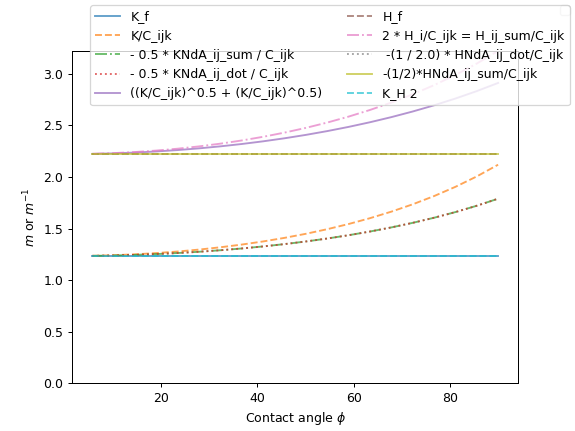

interactive(children=(FloatSlider(value=0.5, description='R', max=2.0, step=0.05), IntSlider(value=5, descript…

In [16]:
##### %matplotlib notebook
%matplotlib notebook
R=0.5
N=7
c_outd_list, c_outd, vdict, X = out_plot(N=N, R=R)
#plot_variables(X, vdict, xlabel=r'Contact angle $\phi$')

fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
ax = fig.add_subplot(1, 1, 1)

lstyles = ['-', '--', '-.', ':']
mod = len(lstyles)
ind = 0
Lines = {}
fig.legend()
for key, value in vdict.items():
    line, = ax.plot(X, value, linestyle=lstyles[ind], label=key, alpha=0.7)
    Lines[key] = line
    #plot.plot(X, value, linestyle=lstyles[ind], label=key, alpha=0.7)
    ind += 1
    ind = ind % mod
     
@interact(R=(0.0,2.0,0.05), N=(3,20,1))
def update(R=0.5, N=5):
    c_outd_list, c_outd, vdict, X = out_plot(N=N, R=R)
    #H_f = 1 / R + 1 / R
    #K_f = (1 / R) ** 2
    ind = 0
    maxy = 0.0
    for key, value in vdict.items():
        Lines[key].set_xdata(X)
        Lines[key].set_ydata(value)
        ind += 1
        ind = ind % mod
        maxy = max(maxy, np.max(value))
        
    fig.canvas.draw_idle()
    ax.set_ylim(0.0, maxy)  

plot.xlabel(r'Contact angle $\phi$')
plot.ylabel(r'$m$ or $m^{-1}$')
#fig.legend(bbox_to_anchor=(1, 0.5), loc='right', ncol=2)
fig.legend(ncol=2)
#interact(update);

In [6]:
np.sqrt(4**2 - 4)

3.4641016151377544

# Principle curvatures

### The Gaussian and mean curvatures are related to each other through the principle curvatures:

Gaussian: $K=\kappa_{1} \kappa_{2}$

Mean: $H=\frac{\kappa_{1}+\kappa_{2}}{2}$

Since we know that $\kappa_{1} = \kappa_{2} $ we have $K=\kappa_{1}^2$ so 

$$
H=\frac{\sqrt{K}+\sqrt{K}}{2}
$$

The principle curvatures in the smooth setting are defined by:

$$
\begin{array}{l}
\kappa_{1}=H-\sqrt{H^{2}-K} \\
\kappa_{2}=H+\sqrt{H^{2}-K}
\end{array}
$$

The discrete principle curvatures can be found from

$$\frac{H_{i}}{A_{i}} \pm \sqrt{\left(\frac{H_{i}}{A_{i}}\right)^{2}-\frac{K_{i}}{A_{i}}}$$

Where the vertex normal curvature $H_{i}:=\frac{1}{4} \sum_{i j \in E} \ell_{i j} \varphi_{i j}$ is normalized over the area of the dual cell $A_{i}:=\left|C_{i}\right|$:

In [7]:
R = 0.5 # Radius of the droplet sphere
K_f = (1/R)**2
H_f = 1/R + 1/R
K_f, H_f

(4.0, 4.0)

In [8]:
kappa_1 = H_f - np.sqrt(H_f**2 - K_f)
kappa_2 = H_f + np.sqrt(H_f**2 - K_f)
kappa_1, kappa_2

(0.5358983848622456, 7.464101615137754)

In [9]:
kappa_1*kappa_2 , (kappa_1 + kappa_2)/2.0

(4.000000000000002, 4.0)

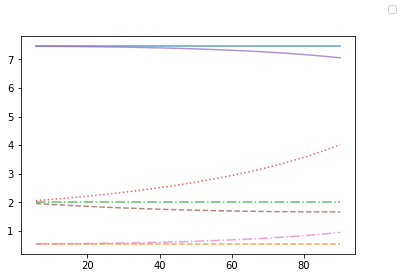

interactive(children=(FloatSlider(value=0.5, description='R', max=2.0, step=0.05), IntSlider(value=5, descript…

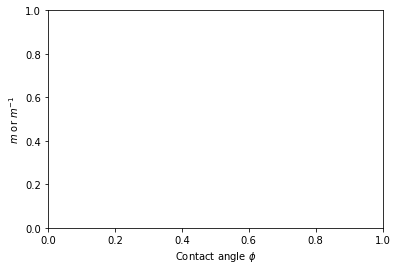

In [11]:
def out_plot_kappa(N=5, R=0.5):
    Phi = np.linspace(0.1, 0.5 * np.pi, 20)
    H_f = 1 / R + 1 / R
    K_f = (1 / R) ** 2
    H_i = []
    H_ij_sum = []
    K = []
    HNdA_ij_sum = []
    HNdA_ij_dot = []
    HdotNdA_ij_sum = []
    N_f0 = np.array([0.0, 0.0, 1.0])
    c_outd_list = []
    
    for phi in Phi:
        F, nn = droplet_half_init(R, N, phi)
        HC = construct_HC(F, nn)
        v = HC.V[(0.0, 0.0, R)]
        F, nn = vectorise_vnn(v)
        c_outd = curvatures(F, nn, n_i=N_f0)
        c_outd['K_f'] = K_f
        c_outd['H_f'] = H_f
        H_i.append(c_outd['H_i'])
        H_ij_sum.append(c_outd['H_ij_sum'])
        HNdA_ij_sum.append(np.sum(c_outd['HNdA_ij']))
        HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        c_outd['HNdA_i']
        HdotNdA_ij_sum.append(np.dot(c_outd['HNdA_ij'], N_f0))
        K.append(c_outd['K'])
        c_outd_list.append(c_outd)

    A_ijk = []
    C_ijk = []
    z = []
    
    for c_outd in c_outd_list:
        A_ijk.append(np.sum(c_outd['A_ijk']))
        C_ijk.append(np.sum(c_outd['C_ijk']))
        theta = 0.0
        r = R / np.cos(theta)  # = R at theta = 0
        y = r - r*np.sin(theta)
        theta_z = np.arctan(y/R)
        z_phi = y / np.sin(theta_z)
        z.append(z_phi)

    A_ijk = np.array(A_ijk)
    C_ijk = np.array(C_ijk)
    K_f = []
    H_f = []

    
    for c_outd in c_outd_list:
        K_f.append(np.sum(c_outd['K_f']))
        H_f.append(np.sum(c_outd['H_f']))
   
    # Define point cuvatures
    C_ijk = np.array(C_ijk)
    HNdA_ij_sum = np.array(HNdA_ij_sum)
    H_i = H_i /  C_ijk
    H_ij = -(1 / 2.0) * HNdA_ij_sum / C_ijk
    K = K / C_ijk
    kappa_1_i = H_i + np.sqrt(H_i**2 - K)
    kappa_2_i = H_i - np.sqrt(H_i**2 - K)
    kappa_ij_1 = H_ij + np.sqrt(H_ij**2 - K)
    kappa_ij_2 = H_ij - np.sqrt(H_ij**2 - K)
    
    kappa_1_i = H_i + np.sqrt(H_i**2 - K)
    kappa_2_i = H_i - np.sqrt(H_i**2 - K)
    kappa_ij_1 = H_ij + np.sqrt(H_ij**2 - K)
    kappa_ij_2 = H_ij - np.sqrt(H_ij**2 - K)
    
    kappa_1_f = H_f + np.sqrt(np.array(H_f)**2 - K_f)
    kappa_2_f = H_f - np.sqrt(np.array(H_f)**2 - K_f)
    
    vdict = {'kappa_1_f': kappa_1_f,
             'kappa_2_f': kappa_2_f,
             'kappa_1_symmetric': np.sqrt(K_f),
             'kappa_i_1': kappa_1_i,
             'kappa_ij_1': kappa_ij_1,
             'kappa_i_2': kappa_2_i,
             'kappa_ij_2': kappa_ij_2,
             }
    X = Phi * 180 / np.pi

    return c_outd_list, c_outd, vdict, X

##### %matplotlib notebook

R=0.5
N=20
c_outd_list, c_outd, vdict, X = out_plot_kappa(N=N, R=R)
#plot_variables(X, vdict, xlabel=r'Contact angle $\phi$')

fig = plt.figure()
#ax = fig.add_subplot(2, 1, 1)
ax = fig.add_subplot(1, 1, 1)

lstyles = ['-', '--', '-.', ':']
mod = len(lstyles)
ind = 0
Lines = {}
fig.legend()
for key, value in vdict.items():
    line, = ax.plot(X, value, linestyle=lstyles[ind], label=key, alpha=0.7)
    Lines[key] = line
    #plot.plot(X, value, linestyle=lstyles[ind], label=key, alpha=0.7)
    ind += 1
    ind = ind % mod
     
@interact(R=(0.0,2.0,0.05), N=(3,20,1))
def update(R=0.5, N=5):
    c_outd_list, c_outd, vdict, X = out_plot_kappa(N=N, R=R)
    #H_f = 1 / R + 1 / R
    #K_f = (1 / R) ** 2
    ind = 0
    maxy = 0.0
    for key, value in vdict.items():
        Lines[key].set_xdata(X)
        Lines[key].set_ydata(value)
        ind += 1
        ind = ind % mod
        maxy = max(maxy, np.max(value))
        
    fig.canvas.draw_idle()
    ax.set_ylim(0.0, maxy +0.1)  

plot.xlabel(r'Contact angle $\phi$')
plot.ylabel(r'$m$ or $m^{-1}$')
fig.legend(bbox_to_anchor=(1, 0.5), loc='right', ncol=2)
fig.legend(ncol=2)
#interact(update);

# A

# Plane projections